# Wrangle 
This code reformats the LTRM data to be in the format of (location, year, hydrological data, each fish species presence/absence). This notebook also takes care of the missing data and filters down the LTRM to just Pool 4, Backwater, Period 3, and Electrofishing.   

For reference: [Data Dictionary](https://www.umesc.usgs.gov/cgi-bin/ltrmp/fish/fish_meta.pl)
***

In [11]:
import pandas as pd

Reading in the data, and taking a peak at what we're dealing with

In [12]:
df = pd.read_csv("data/pools.csv", low_memory=False) # multiple data types in the same column
pd.set_option('display.max_columns', 500)
print(df.shape) # shows the number of rows and columns
df.head()

(229252, 85)


,site,barcode,fstation,sitetype,stratum,sdate,stime,fdate,ftime,pool,lcode,gear,period,rep,summary,project,effdist,effhr,effmin,pwrgoal,pwrused,volts,v_qf,amps,a_qf,pulses,p_qf,dutycyc,dc_qf,utmzone,utm_e,utm_n,gisgrid,zone15e,zone15n,gpsmeth,gpsacc,secchi,s_qf,temp,t_qf,depth,d_qf,cond,c_qf,current,cv_qf,do,do_qf,stageht,sh_qf,sveg92,vegd,eveg92,esveg92,substrt,snag,wingdyke,trib,riprap,inout,closing,flooded,othrstrc,labind,contanrs,shtcnt,totfishc,leader,pageno,rec_site,rownum,fishcode,length,tfs,grp_wdth,catch,weight,pathcode,subproj,userdef,recorder,nfsh_cnt,orphflag,batchno
0,NaN,11000028,1,0.0,BWC-S,06/18/1993,11:29,06/18/1993,11:44,04,D16.RS,D,1,NaN,5.0,M-,NaN,0.0,15.0,4545.0,4600.0,200.0,NaN,23.0,NaN,60.0,NaN,25.0,NaN,15,580430,4912058,58045.91185,580430,4912058,1.0,0.1,60.0,NaN,19.8,NaN,0.9,NaN,515.0,NaN,0.17,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,N,NaN,3.0,64.0,NaN,1.0,1.0,15.0,GDRH,500.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,555.0,28.0,0,9301
1,NaN,11000028,1,0.0,BWC-S,06/18/1993,11:29,06/18/1993,11:44,04,D16.RS,D,1,NaN,5.0,M-,NaN,0.0,15.0,4545.0,4600.0,200.0,NaN,23.0,NaN,60.0,NaN,25.0,NaN,15,580430,4912058,58045.91185,580430,4912058,1.0,0.1,60.0,NaN,19.8,NaN,0.9,NaN,515.0,NaN,0.17,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,N,NaN,3.0,64.0,NaN,2.0,1.0,15.0,BLGL,170.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,555.0,28.0,0,9301
2,NaN,11000028,1,0.0,BWC-S,06/18/1993,11:29,06/18/1993,11:44,04,D16.RS,D,1,NaN,5.0,M-,NaN,0.0,15.0,4545.0,4600.0,200.0,NaN,23.0,NaN,60.0,NaN,25.0,NaN,15,580430,4912058,58045.91185,580430,4912058,1.0,0.1,60.0,NaN,19.8,NaN,0.9,NaN,515.0,NaN,0.17,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,N,NaN,3.0,64.0,NaN,2.0,1.0,16.0,BLGL,140.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,555.0,28.0,0,9301
3,NaN,11000028,1,0.0,BWC-S,06/18/1993,11:29,06/18/1993,11:44,04,D16.RS,D,1,NaN,5.0,M-,NaN,0.0,15.0,4545.0,4600.0,200.0,NaN,23.0,NaN,60.0,NaN,25.0,NaN,15,580430,4912058,58045.91185,580430,4912058,1.0,0.1,60.0,NaN,19.8,NaN,0.9,NaN,515.0,NaN,0.17,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,N,NaN,3.0,64.0,NaN,1.0,1.0,16.0,SVRH,460.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,555.0,28.0,0,9301
4,NaN,11000028,1,0.0,BWC-S,06/18/1993,11:29,06/18/1993,11:44,04,D16.RS,D,1,NaN,5.0,M-,NaN,0.0,15.0,4545.0,4600.0,200.0,NaN,23.0,NaN,60.0,NaN,25.0,NaN,15,580430,4912058,58045.91185,580430,4912058,1.0,0.1,60.0,NaN,19.8,NaN,0.9,NaN,515.0,NaN,0.17,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,N,NaN,3.0,64.0,NaN,1.0,1.0,17.0,SHRH,370.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,555.0,28.0,0,9301


Next we filter the data to backwater, period 3, electrofishing. 

In [13]:
df = df[df['stratum'].isin(['BWC-O', 'BWC-S'])].reset_index(drop=True)
#df = df[df['period'] == 3].reset_index(drop=True)
df = df[df['gear'].isin(['D', 'N'])].reset_index(drop=True)
print(df.shape)

(229252, 85)


Only some of the columns are relevant, so we will drop the rest. 

In [14]:
keep_cols = ['utm_e', 'utm_n', 'sdate', 'stratum', 'period', 'gear', 'fishcode',
             'temp', 'depth', 'current', 'do', 
             'vegd', 'esveg92']
df = df[keep_cols]

### Missing Data 
***

First we compute the percentage of our data that is missing. We remove any rows with missing fishcode, temperature, or depth because those seem like critical variables. 

In [15]:
print(100*(df.isna().sum() / df.shape[0]))
df = df[df[['fishcode', 'temp', 'depth']].isna().sum(axis=1) == 0].reset_index(drop=True)

utm_e        0.000000
utm_n        0.000000
sdate        0.000000
stratum      0.000000
period       0.000000
gear         0.000000
fishcode     0.653866
temp         0.663462
depth        1.140666
current      5.023729
do          26.364001
vegd        57.297646
esveg92      7.839844
dtype: float64


Let's take a quick look at how that missing data relates between different variables in a missing data pattern plot

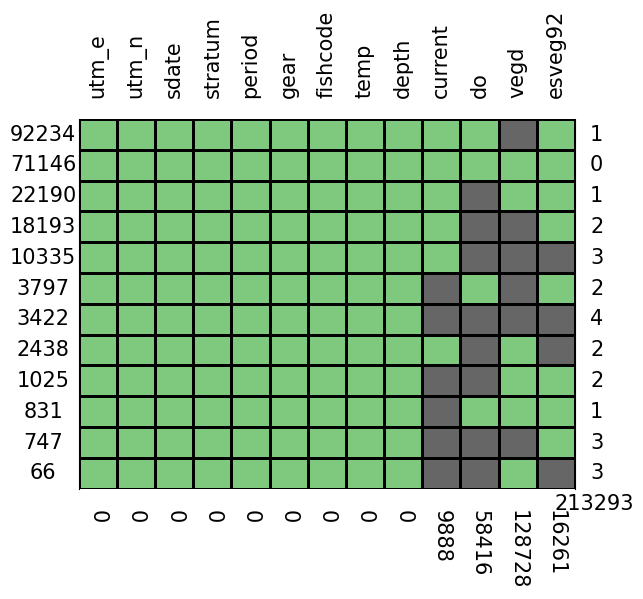

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

def pattern_missing(self):
    # Create a DataFrame to track missing value patterns
    missing_patterns = self.isna().astype(int).astype(str).agg('-'.join, axis=1)
    pattern_counts = missing_patterns.value_counts().sort_index()
    patterns_df = pattern_counts.reset_index()
    patterns_df.columns = ['Pattern', 'Count']

    # Convert the pattern to a list of binary missing values
    patterns_df['Pattern'] = patterns_df['Pattern'].apply(lambda x: [int(val) for val in x.split('-')])

    # Calculate how many features are missing in each pattern
    patterns_df['Missing_Features'] = patterns_df['Pattern'].apply(lambda x: sum(x))

    # Count missing values per column
    missing_counts = self.isna().sum()

    # Reorder rows by frequency of missing value combinations
    patterns_df = patterns_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

    # Calculate the sum of bottom tick labels
    sum_missing_counts = missing_counts.sum()

    # Prepare the data for plotting
    pattern_matrix = np.zeros((len(patterns_df), len(self.columns)))
    for i, pattern in enumerate(patterns_df['Pattern']):
        pattern_matrix[i, :] = pattern

    # Create the plot
    fig, ax1 = plt.subplots()

    # Create a heatmap with grid lines
    sns.heatmap(pattern_matrix, cmap="Accent", cbar=False, ax=ax1,
                xticklabels=False, yticklabels=False, linecolor='black', linewidth=1)

    # Set ticks for the main x-axis
    ax1.set_xticks(np.arange(len(self.columns)) + 0.5)
    ax1.set_xticklabels([str(count) for count in missing_counts], ha='center', fontsize=15, rotation = -90)
    ax1.xaxis.set_label_position('bottom')
    ax1.xaxis.set_ticks_position('bottom')
    ax1.tick_params(which='both', length=0, pad=15)  # Remove ticks
    # Add the sum label to the bottom right corner
    ax1.text(len(self.columns) + 0.5, pattern_matrix.shape[0] + 0.5, f'{sum_missing_counts}', va='center', ha='center', fontsize=15)


    # Add feature labels along the top by twinning the x-axis
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())  # Align x-limits with ax1
    ax2.set_xticks(ax1.get_xticks())  # Align ticks with ax1
    ax2.set_xticklabels(self.columns, ha='center', fontsize=15, rotation=90)
    ax2.xaxis.set_label_position('top')
    ax2.xaxis.set_ticks_position('top')
    ax2.tick_params(axis='x', which='major', pad=15)

    # Remove the top spine and ticks for the twinned axis
    ax2.spines['top'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.tick_params(which='both', length=0)  # Remove ticks

    # Add row labels on the left and right, centered
    ax1.set_yticks(np.arange(len(patterns_df)) + 0.5)
    ax1.set_yticklabels(patterns_df['Count'], va='center', ha='center', position=(-0.03, 0.5), fontsize=15)

    # Add labels along the right to count how many missing features belong to that combination
    for i, count in enumerate(patterns_df['Missing_Features']):
        ax1.text(len(self.columns) + 0.4, i + 0.5, str(count), va='center', ha='left', fontsize=15)
        
    plt.show()

# Add the method to pandas DataFrame
pd.DataFrame.pattern_missing = pattern_missing
df.pattern_missing()

Next we'll take a look at how these missing valus have emerged over time

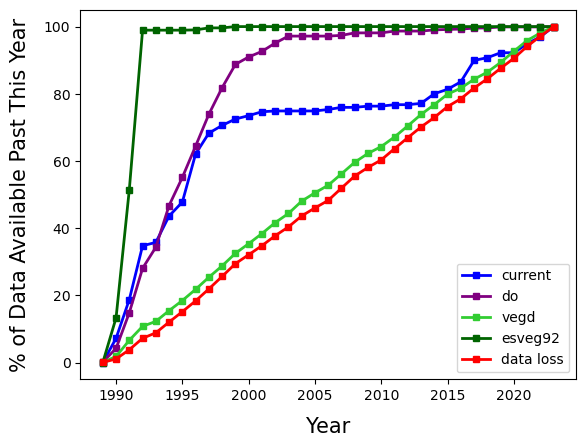

In [17]:
# how do these missing values change with time?
fig, ax = plt.subplots()

# take just the missing columns and the year
sub_df = df[['sdate', 'current', 'do', 'vegd', 'esveg92']].copy()
sub_df['year'] = pd.to_datetime(sub_df['sdate']).dt.year

missing_cols = ['current', 'do', 'vegd', 'esveg92']
colors = ['blue', 'purple', 'limegreen', 'darkgreen']
for n, col in enumerate(missing_cols):
    sub_df[col + '_missing'] = sub_df[col].isna()
    missing_by_year = sub_df.groupby('year')[col + '_missing'].sum() / sub_df[col].isna().sum()
    ax.plot(100*missing_by_year.cumsum(), label = col, color = colors[n], marker='s', markersize = 4, linewidth=2)
    ax.set_xlabel("Year", fontsize=15, labelpad=10)
    ax.set_ylabel("% of Data Available Past This Year", fontsize=15, labelpad=10)

ax.plot(100*(sub_df.groupby('year')['sdate'].count() / df.shape[0]).cumsum(), label = 'data loss', color = 'red', marker='s', markersize = 4, linewidth=2)
ax.legend();

Roughly around 2005 is a decent place to split the data, afterwards we have a good majority of all our variables without sacraficing a huge data loss. 

In [18]:
df['year'] = pd.to_datetime(df['sdate']).dt.year
df = df[df['year'] >= 2005].dropna().reset_index(drop=True)
print(df.shape)
df.head()

(59202, 14)


,utm_e,utm_n,sdate,stratum,period,gear,fishcode,temp,depth,current,do,vegd,esveg92,year
0,582030,4913558,10/17/2006,BWC-S,3,D,LMBS,12.3,0.63,0.0,7.8,2.0,3.0,2006
1,582030,4913558,10/17/2006,BWC-S,3,D,LMBS,12.3,0.63,0.0,7.8,2.0,3.0,2006
2,582030,4913558,10/17/2006,BWC-S,3,D,LMBS,12.3,0.63,0.0,7.8,2.0,3.0,2006
3,582030,4913558,10/17/2006,BWC-S,3,D,LMBS,12.3,0.63,0.0,7.8,2.0,3.0,2006
4,582030,4913558,10/17/2006,BWC-S,3,D,LMBS,12.3,0.63,0.0,7.8,2.0,3.0,2006


### Reformatting
***

Next we'll find all our unique locations. We will treat these as distinct assemblages for now, even though some of them may be very close to one-another and could be merged. 

In [19]:
unique_locs = df[['utm_e', 'utm_n']].drop_duplicates()
unique_locs['loc_id'] = range(len(unique_locs))
df = df.merge(unique_locs, on=['utm_e', 'utm_n'], how='left')

# get rid of some columns
df = df.drop(columns = ['utm_e', 'utm_n', 'sdate', 'vegd', 'esveg92', 'period', 'gear', 'stratum'])

df.head()

,fishcode,temp,depth,current,do,year,loc_id
0,LMBS,12.3,0.63,0.0,7.8,2006,0
1,LMBS,12.3,0.63,0.0,7.8,2006,0
2,LMBS,12.3,0.63,0.0,7.8,2006,0
3,LMBS,12.3,0.63,0.0,7.8,2006,0
4,LMBS,12.3,0.63,0.0,7.8,2006,0


And we'll pivot this data so that the presence/absence of each species is it's own column (instead of it's own row) 

In [20]:
df['presence'] = 1  # Add a column to represent fish presence
df_binary = df.pivot_table(index=['loc_id', 'year'], 
                           columns='fishcode', 
                           values='presence', 
                           aggfunc='max', 
                           fill_value=0).reset_index()
df = pd.merge(df, df_binary, on=['loc_id', 'year'], how='left')
df.drop(columns = ['fishcode', 'presence'], inplace=True)
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
df

,temp,depth,current,do,year,loc_id,BGWM,BHMW,BKBF,BKBH,BKCP,BKSS,BLGL,BMBF,BNBH,BNMW,BUSK,BWFN,CARP,CCGF,CMMW,CNCF,CNLP,CNSN,ERSN,FHCF,FHMW,FWDM,GDFH,GDRH,GDSN,GNSF,GSBG,GSCP,GSOS,GSPK,GSPS,GZSD,HFCS,JYDR,LGPH,LMBS,LNGR,MDDR,MMSN,MNEY,MQTF,NHSK,NTPK,OSSF,PDFH,PDSN,PGMW,PNSD,PRPH,PSBG,PSWM,QLBK,RDSN,RESF,RKBS,RVCS,RVRH,RVSN,SBSN,SBWB,SFSN,SGER,SHDR,SHRH,SJHR,SMBF,SMBS,SMMW,SNGR,SNSN,SPSK,STGR,STSN,SVCB,SVCP,SVLP,SVMW,SVRH,TFSD,TPMT,TTPH,U-CN,U-CT,U-CY,U-IL,U-LY,WDSN,WLYE,WRMH,WTBS,WTCP,WTSK,YLBH,YOYF,YWBS,YWPH
0,12.3,0.63,0.00,7.8,2006,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1
1,8.5,0.66,0.00,9.2,2006,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,25.2,1.90,0.03,4.7,2007,2,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,18.2,1.40,0.00,2.7,2006,3,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,17.7,1.00,0.00,9.0,2006,4,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,28.9,1.50,0.00,5.5,2007,1013,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1089,28.6,1.60,0.00,3.4,2007,1014,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1090,27.3,1.90,0.00,11.6,2007,1015,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
1091,25.5,2.00,0.00,3.4,2007,1016,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Finally, we save the data so other people can play with it! 

In [42]:
df.to_csv("data/pool4_wrangled.csv", index=False)